In [1]:
import os
import sys
import torch

PUBDIR = os.getcwd()
ROOT_DIR = os.path.dirname(PUBDIR)
DATA_DIR = os.path.join(ROOT_DIR, "data")
sys.path.append(ROOT_DIR)

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
# Load ontology
from core.data_model import Patient, Disease, Ontology
from core.data_model import Diseases
from core.io_ops import load_pickle
from core.augmentation import cleanse_data

disease_data = load_pickle(os.path.join(DATA_DIR, "diseases.pickle"))
vectorized_hpo = load_pickle(os.path.join(DATA_DIR, "hpo_definition.vector.pickle"))
ontology = Ontology(vectorized_hpo)
omim_diseases = Diseases([disease for disease in disease_data if disease.id.startswith("OMIM")])

/data/heon_dev/repository/LaRa/core/data_model.py:283: UnicodeWarning: unsound encoding, assuming ISO-8859-1 (73% confidence)
  ontology = pronto.Ontology(SORUCE_URL["hpo_obo"])


In [3]:
import glob
from core.benchmark import load_phenopacket_patients
from core.data_model import HPO, HPOs, Patient, Patients

benchmark_patients:Patients = load_phenopacket_patients(
    phenopacket_dir=os.path.join(DATA_DIR, "phenopackets"),
    ontology=ontology
)
print(benchmark_patients)

Patients(N=384)


In [4]:
inhouse_patients:Patients = load_pickle(os.path.join(DATA_DIR, "patients.pickle"))

Text(0.5, 1.0, 'N HPOs of patient in 3B')

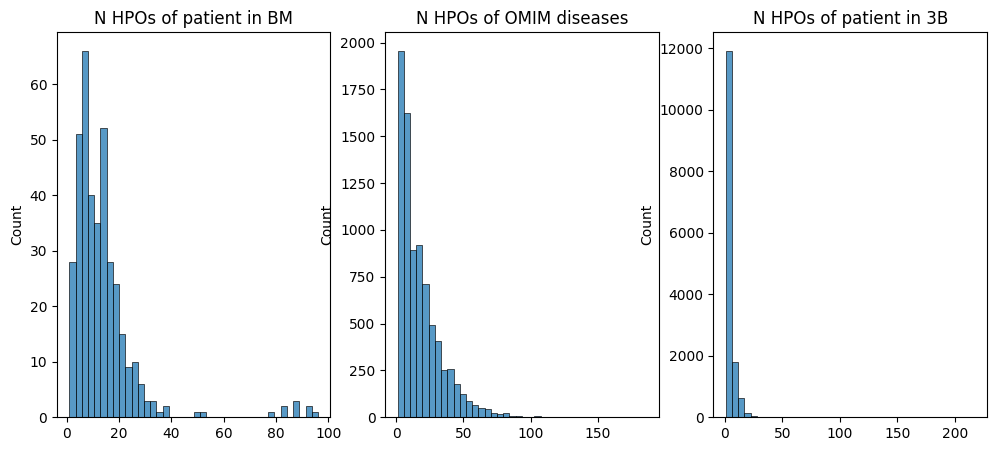

In [5]:
# N HPOs
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(12, 5))
sns.histplot([len(patient.hpos) for patient in benchmark_patients], bins=40, ax=axes[0])
sns.histplot([len(disease.hpos) for disease in omim_diseases], bins=40, ax=axes[1])
sns.histplot([len(patient.hpos) for patient in inhouse_patients], bins=40, ax=axes[2])

axes[0].set_title("N HPOs of patient in BM")
axes[1].set_title("N HPOs of OMIM diseases")
axes[2].set_title("N HPOs of patient in 3B")

In [8]:
# Inhouse dataset과 BM데이터셋의 공통 질환이 어느정도 있는가?

inhouse_diseases = {disease_id for patient in inhouse_patients for disease_id in patient.disease_ids}
benchmark_diseases = {disease_id for patient in benchmark_patients for disease_id in patient.disease_ids}

print("N Intersection:", len(inhouse_diseases & benchmark_diseases))

N Intersection: 193
